In [30]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [31]:
df= pd.read_csv("C:/Users/Zehra/Desktop/Python-SQL/titanic.csv")

In [32]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

<AxesSubplot:>

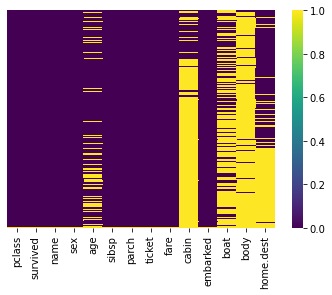

In [33]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [34]:
df.drop(["cabin", "boat", "body", "home.dest"], axis=1, inplace=True)

In [35]:
df.dropna(inplace=True)

In [36]:
df.dtypes

pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
dtype: object

In [37]:
sex = pd.get_dummies(df["sex"], drop_first = True)
pclass = pd.get_dummies(df["pclass"], drop_first = True)
embarked = pd.get_dummies(df["embarked"], drop_first = True)

In [38]:
df.drop(["sex", "embarked","pclass"], axis=1, inplace=True)

In [39]:
df=pd.concat([df,sex,embarked,pclass], axis=1)

In [40]:
df.drop(["name","ticket"], axis=1, inplace= True)
df.head(2)

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0


In [13]:
X = df.drop("survived", axis=1)
y = df["survived"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [ ]:
#Binary Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model=LogisticRegression(max_iter=1000)

In [18]:
#modeli eğitme
lg_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
#modelin doğruluk skoru
#%77 doğru biliyor
lg_model.score(X_test,y_test)

0.7701149425287356

In [20]:
#modelin eğitim verisi skoru
#modelin eğitim ve test verisindeki skorların yakın olması daha iyi.
#modelin eğitim verisindeki skoru daha yüksek.modelde aşırı uydurma problemi var.
lg_model.score(X_train,y_train)

0.8069053708439897

In [21]:
#aşırı uydurmadan kurtulmak için C argümanı kullanılır.
lg_model=LogisticRegression(C=0.1, max_iter=1000)
lg_model.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [22]:
print(lg_model.score(X_test,y_test))
print(lg_model.score(X_train,y_train))

0.7816091954022989
0.7953964194373402


In [23]:
#model değerlendirme

In [24]:
tahmin = lg_model.predict(X_test)

In [25]:
confusion_matrix(y_test,tahmin)

array([[124,  21],
       [ 36,  80]], dtype=int64)

In [26]:
df.head(1)

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0,0.0,0.0,211.3375,0,0,1,0,0


In [27]:
#deneme
yeni_veri=np.array([[29,0,0,211.3375,0,0,1,0,0]])

In [28]:
lg_model.predict(yeni_veri)

array([1.])